## Exemplo 1 Decision Trees - Classificação de Flores
Disciplina de Data Mining UFSC

Importam-se as bibliotecas e carregam-se os dados:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [ ]:
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_train.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,100.000000,100.000000,100.000000,100.000000
mean,5.883000,3.074000,3.764000,1.199000
std,0.856827,0.458284,1.784134,0.776224
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.425000,3.400000,5.100000,1.825000
max,7.900000,4.400000,6.900000,2.500000


## Treinamento do modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Avaliação

In [ ]:
accuracy_train = sum(model.predict(X_train)==y_train)/len(y_train)
accuracy_test = sum(model.predict(X_test)==y_test)/len(y_test)
print(f"Acurácia no conjunto de treinamento = {accuracy_train} - acurácia no conjunto de teste = {accuracy_test}")

Acurácia no conjunto de treinamento = 1.0 - acurácia no conjunto de teste = 0.98


## Criando a visualização

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [ ]:
!dot -Tpng tree.dot -o tree.png


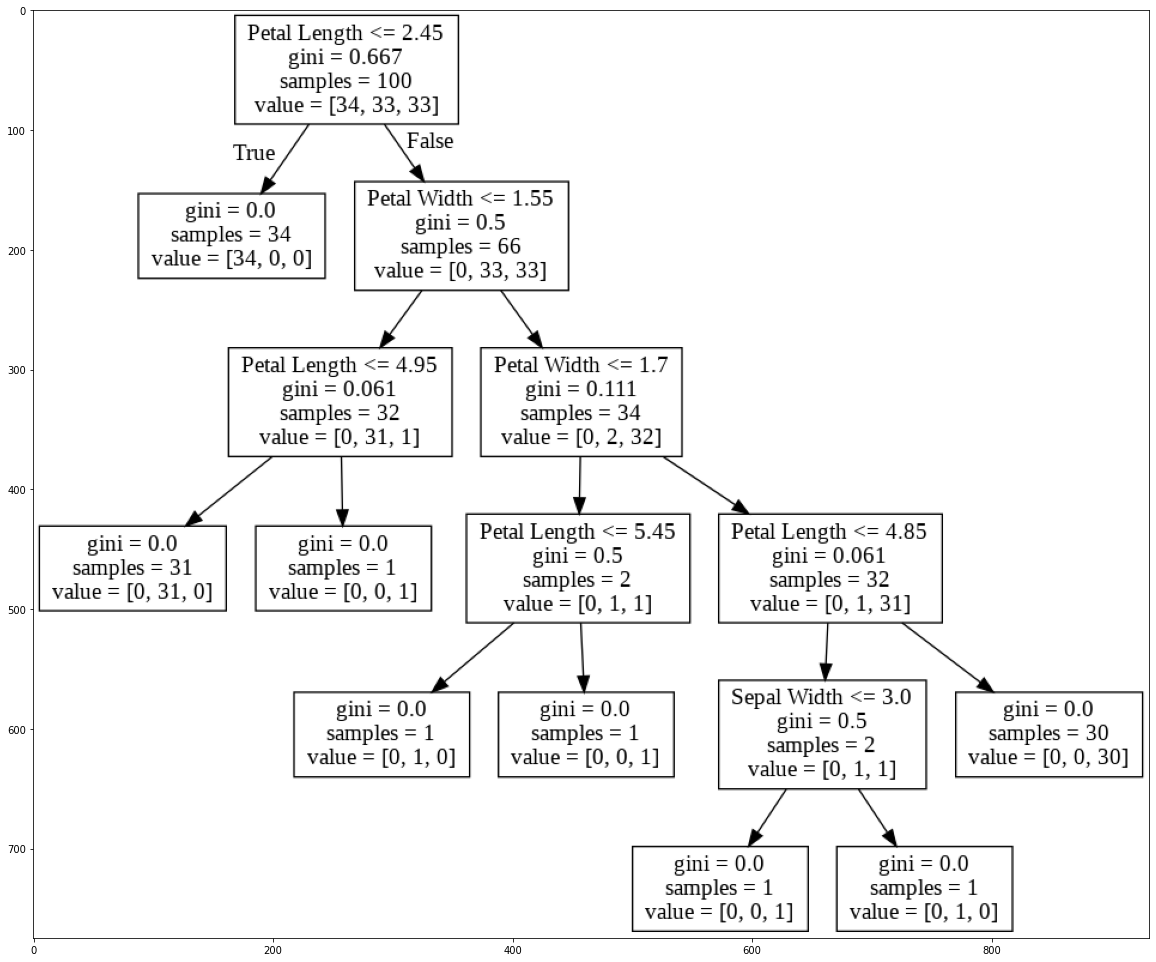

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

exemplo extraído e adaptado de https://towardsdatascience.com/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1